In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 5

In [8]:
daily_stock_data_filename = 'daily_stock_data_merged.pkl'

daily_stock_data_merged = pd.read_pickle(daily_stock_data_filename)

In [9]:
# ownership percentage. shares / cshoc

daily_stock_data_merged['IIP'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']

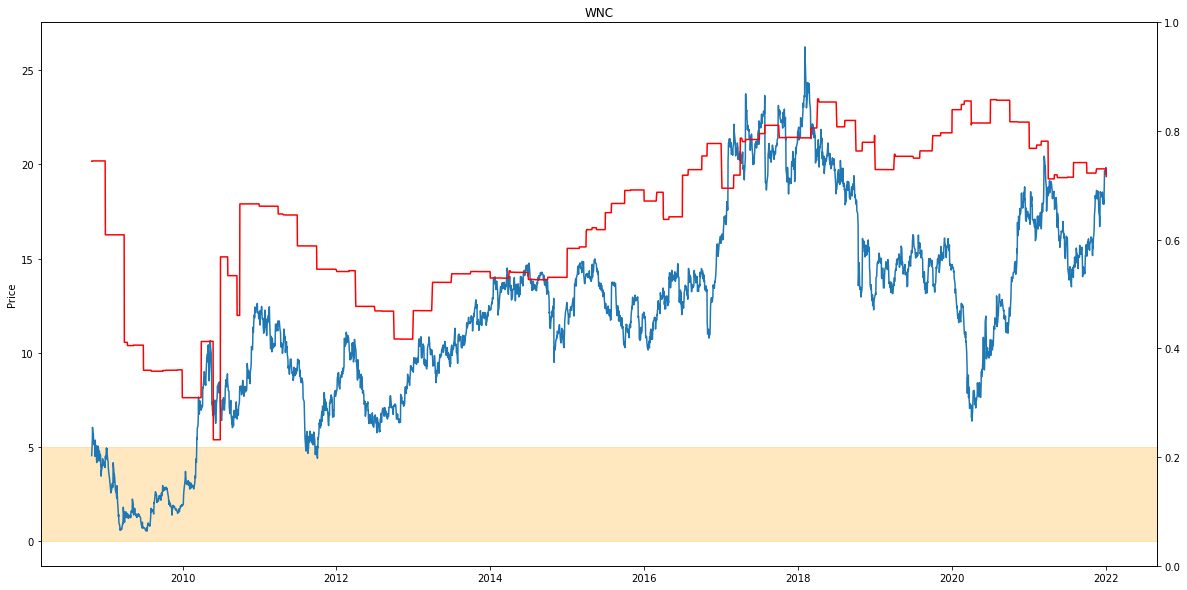

In [13]:
# All stocks in daily stock data
all_stocks = daily_stock_data_merged['cusip_x'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data_merged[daily_stock_data_merged['cusip_x'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Plot institutional ownership with twin y 
ax2 = ax.twinx()
ax2.plot(random_stock_data['date'], random_stock_data['IIP'], color='red')
ax2.set_ylim(0, 1)
# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

In [15]:
daily_stock_data_merged.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip_x', 'ajexdi', 'cshoc',
       'cshtrd', 'prccd', 'prchd', 'prcld', 'prcod', 'prcstd', 'trfd', 'exchg',
       'fic', 'loc', 'sic', 'date', 'first_time_below_thresh', 'cusip_brief',
       'cusip_y', 'fdate', 'shares', 'instituional_ownership_perc', 'IIP'],
      dtype='object')

In [32]:
mask = (daily_stock_data_merged['tic'] == 'SPB')
spb = daily_stock_data_merged[mask]

In [27]:
# for each year in datadate add a column of IIP quintile
daily_stock_data_merged['year'] = daily_stock_data_merged['date'].dt.year
daily_stock_data_merged['IIP_quintile'] = daily_stock_data_merged.groupby(['year'])['IIP'].transform(lambda x: pd.qcut(x, 5, labels=False, duplicates='drop'))

c:\Users\Rukh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,gvkey,iid,datadate,tic,cusip_x,ajexdi,cshoc,cshtrd,prccd,prchd,...,date,first_time_below_thresh,cusip_brief,cusip_y,fdate,shares,instituional_ownership_perc,IIP,year,IIP_quintile
23027,3007,1,2008/11/20,EAT,109641100,1.0,101840000.0,4012410.0,4.75,5.38,...,2008-11-20,1,10964110,10964110,2008-11-20,84696123.0,0.831659,0.831659,2008,4.0
23028,3007,1,2008/11/21,EAT,109641100,1.0,101840000.0,9419709.0,3.99,4.88,...,2008-11-21,1,10964110,10964110,2008-11-21,84696123.0,0.831659,0.831659,2008,4.0
23029,3007,1,2008/11/24,EAT,109641100,1.0,101840000.0,5459167.0,4.95,5.01,...,2008-11-24,1,10964110,10964110,2008-11-24,84696123.0,0.831659,0.831659,2008,4.0
23030,3007,1,2008/11/25,EAT,109641100,1.0,101840000.0,4945304.0,6.27,6.31,...,2008-11-25,1,10964110,10964110,2008-11-25,84696123.0,0.831659,0.831659,2008,4.0
23031,3007,1,2008/11/26,EAT,109641100,1.0,101840000.0,2193077.0,6.56,6.66,...,2008-11-26,1,10964110,10964110,2008-11-26,84696123.0,0.831659,0.831659,2008,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745346,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,...,2021-12-27,1,Y8565N30,Y8565N30,2021-12-27,6453160.0,0.220999,0.220999,2021,1.0
2745347,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,...,2021-12-28,1,Y8565N30,Y8565N30,2021-12-28,6453160.0,0.220999,0.220999,2021,1.0
2745348,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,...,2021-12-29,1,Y8565N30,Y8565N30,2021-12-29,6453160.0,0.220999,0.220999,2021,1.0
2745349,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,...,2021-12-30,1,Y8565N30,Y8565N30,2021-12-30,6453160.0,0.220999,0.220999,2021,1.0


In [31]:
# groupby cusip_brief and transform a returns column
daily_stock_data_merged['returns'] = daily_stock_data_merged.groupby(['cusip_brief'])['prccd'].transform(lambda x: x.pct_change())

<AxesSubplot:xlabel='IIP_quintile'>

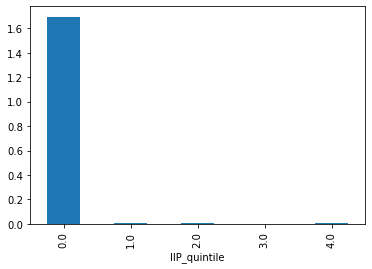

In [36]:
# find average returns for each quintile and plot
avg_returns = daily_stock_data_merged.groupby(['IIP_quintile'])['returns'].mean()
avg_returns.plot(kind='bar')

<AxesSubplot:>

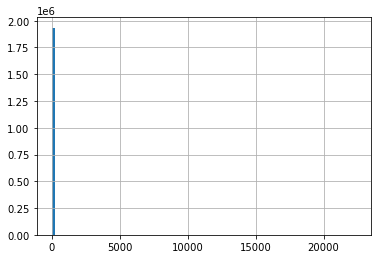

In [38]:
# plot distribution of returns
daily_stock_data_merged['returns'].hist(bins=100)

In [39]:
# describe returns
daily_stock_data_merged['returns'].describe()

count    1.934640e+06
mean     3.420009e-01
std      7.277744e+01
min     -9.999425e-01
25%     -1.351351e-02
50%      0.000000e+00
75%      1.422222e-02
max      2.239900e+04
Name: returns, dtype: float64

In [46]:
qsips = daily_stock_data_merged['cusip_brief'].unique()

In [48]:
# create a df with qsips
qsips = pd.DataFrame(qsips, columns=['qsip'])

# export qsips to txt
qsips.to_csv('qsips.txt', index=False)

In [49]:
daily_stock_data_merged.columns

Index(['gvkey', 'iid', 'datadate', 'tic', 'cusip_x', 'ajexdi', 'cshoc',
       'cshtrd', 'prccd', 'prchd', 'prcld', 'prcod', 'prcstd', 'trfd', 'exchg',
       'fic', 'loc', 'sic', 'date', 'first_time_below_thresh', 'cusip_brief',
       'cusip_y', 'fdate', 'shares', 'instituional_ownership_perc', 'IIP',
       'year', 'IIP_quintile', 'returns'],
      dtype='object')

In [52]:
daily_stock_data_merged['date'].max()

Timestamp('2021-12-31 00:00:00')